In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("C:\\Users\\Sasha\\Desktop\\Py\\Git\\UdemyExerciseML\\Machine Learning A-Z (Codes and Datasets)\\Part 4 - Clustering\\Section 24 - K-Means Clustering\\Python\\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
# select the 2 relevant columns
X = df.iloc[:, [3,4]].values

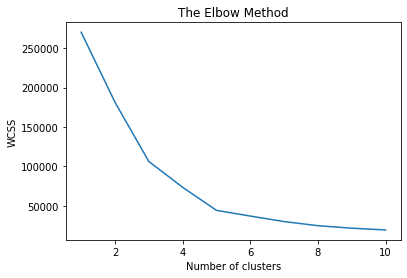

In [14]:
# run multiple clusters for k number variables
#optimal number of clusters is when line descent slows down
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
    kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
    y_kmeans = kmeans.fit_predict(X)

In [16]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


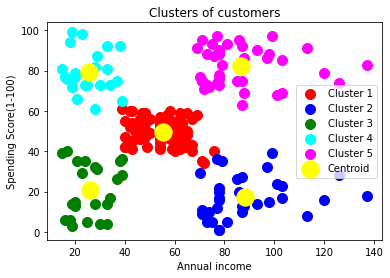

In [18]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, color = "red", label = "Cluster 1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, color = "blue", label = "Cluster 2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, color = "green", label = "Cluster 3")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, color = "cyan", label = "Cluster 4")
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, color = "magenta", label = "Cluster 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, color = "yellow", label = "Centroid")
plt.title("Clusters of customers")
plt.xlabel("Annual income")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()